# SVM on free vs cued recall segments

The VeriMind statements are encoded as either Free or Cued Recall:
- 1 denotes free recall 
- 2 denotes cued recall
- 3 denotes recalls from the question “do you have something to add”.

We will apply our SVM pipeline first to Cued Recall statements (encoding 2). 

Then we will apply the SVM pipeline to Free Recall statements, where we regard encoding 1 and 3 both as free recall. 

Lastly we try running encoding 1 separately, and encoding 2 and 3 together. 

For every segmentation the pipeline is run with an exhaustive grid search that optimizes the hyperparameters for AUC and F1-macro score respectively. 

The results show that we obtain the best results (AUC=0.71, F1-macro=0.58), when running the svm pipeline on encoding 1 and 3. Same AUC score is achieved on encoding 1 alone but lower F1-macro=0.56


In [1]:
import os
import sys
import json

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.utils import within_subject_functional_normalization

In [4]:
from src.config import AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES
from src.plots.misc import plot_hist
from src.svm.pipeline import svm_pipeline

In [5]:
df = pd.read_csv("../data/master_functionals_new_features.csv")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.85800,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0
3335,3335,0,33.463300,0.230548,24.733616,36.905180,38.047897,13.314281,255.713210,0.00000,...,1,100.0,1.0,1,0.00,0.000000,0.0,0.0,0.0,0.0


In [6]:
df["free_cued_recall"].value_counts()

free_cued_recall
2    2760
1     555
3      22
Name: count, dtype: int64

## Cued Recall

Encoding 2.

In [7]:
df_fr = df[df['free_cued_recall'] == 2]
df_fr

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,27.852308,0.230130,19.607422,31.506860,34.374207,14.766785,68.922646,0.00000,...,1,100.0,1.0,2,0.16,0.160000,0.0,0.0,0.0,0.0
3331,3331,0,27.687168,0.203770,20.195457,31.439848,32.236520,12.041061,205.113660,173.75590,...,0,100.0,1.0,2,0.79,0.197500,0.0,0.0,0.0,0.0
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0


In [8]:
participant_ids = df_fr["participant"].values

df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_fr

/tmp/ipykernel_2800136/4175888808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.247128,0.243029,0.921134,0.437355,0.230216,-0.885828,0.070261,0.297254,...,0,20.0,1.0,2,0.130497,-0.003536,0.331042,0.875762,-0.475010,-0.427179
1,1,0,-0.749761,0.877474,-2.046840,-0.406191,0.026621,2.499573,-0.826910,-0.650424,...,1,80.0,1.0,2,-0.067707,0.011551,0.256046,1.037393,-0.542636,-0.411693
2,2,0,-0.638487,-0.349550,-0.118559,-0.822770,-0.789592,-0.713067,-0.025660,0.166837,...,1,60.0,1.0,2,5.084691,1.381418,5.641326,2.236068,-0.267261,0.000000
3,3,0,0.869613,-0.602675,1.053841,0.987032,0.467012,-0.829644,-0.287560,-0.378629,...,1,100.0,2.0,2,-0.751721,-0.653095,-0.687871,-0.524350,-0.353553,-0.282843
4,4,0,0.376321,-0.495052,0.631315,-0.118100,-0.203377,-0.727075,-0.972397,-0.572318,...,1,80.0,1.0,2,-0.395513,-0.358778,-0.091971,-0.665138,-0.532152,-0.456435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,-0.426296,0.663743,-0.868541,0.187972,0.124666,1.117658,-0.764227,-0.782672,...,1,100.0,1.0,2,-0.748540,-0.382743,-0.651631,-0.583460,-0.485071,-0.324443
3331,3331,0,-1.539264,1.351452,-2.201691,-0.036868,-0.475255,2.262863,0.058690,-0.120579,...,0,100.0,1.0,2,-0.526285,0.024723,-0.750479,-0.387241,-0.185695,-0.208514
3332,3332,0,-0.400184,1.311611,-1.038010,-0.400750,0.304980,1.579452,0.831461,0.869225,...,1,80.0,1.0,2,0.578307,0.171206,1.938794,1.053370,-0.529150,-0.446476
3333,3333,0,-0.183899,-0.212176,0.548571,0.198088,-0.506959,-0.892824,0.468644,0.221079,...,1,80.0,2.0,2,-0.280913,-0.178510,-0.687871,-0.524350,-0.353553,-0.282843


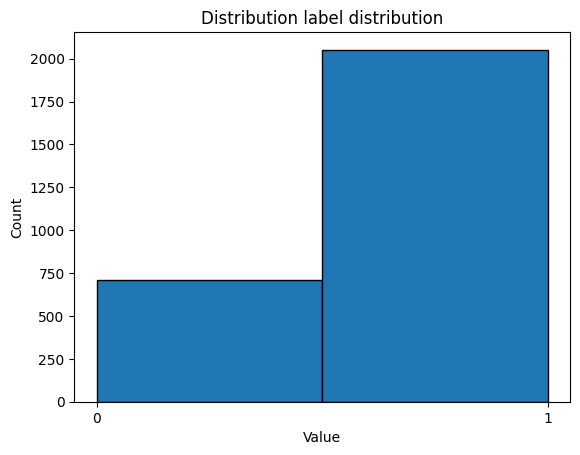

In [9]:
y = df_fr["accuracy"].values
x = df_fr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 10, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid'}

printing accuracy measures
avg (train): 0.6196557971014492
std (train): 0.007883037218128459
avg (validation): 0.5797101449275364
std (validation): 0.019308568977498865

printing roc_auc measures
avg (train): 0.6768584305579918
std (train): 0.0068046028104774905
avg (validation): 0.6098237977036014
std (validation): 0.018001073615531236

printing f1_macro measures
avg (train): 0.5862305204298104
std (train): 0.006052627970300573
avg (validation): 0.5425063934481943
std (validation): 0.014452958009576094


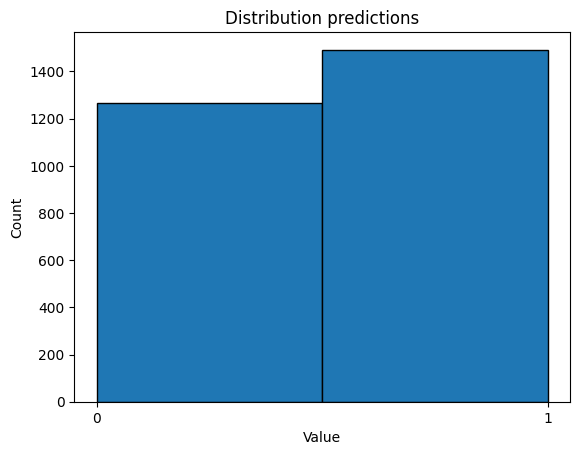

              precision    recall  f1-score   support

           0       0.32      0.58      0.41       708
           1       0.80      0.58      0.67      2052

    accuracy                           0.58      2760
   macro avg       0.56      0.58      0.54      2760
weighted avg       0.68      0.58      0.61      2760



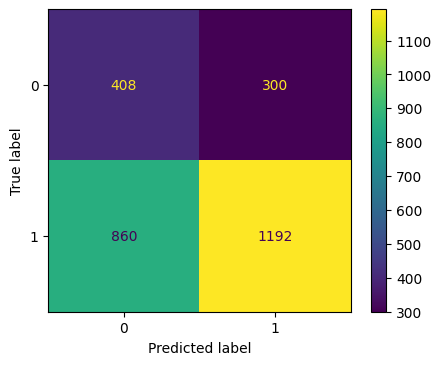

[[ 408  300]
 [ 860 1192]]
params after probability set to True:
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


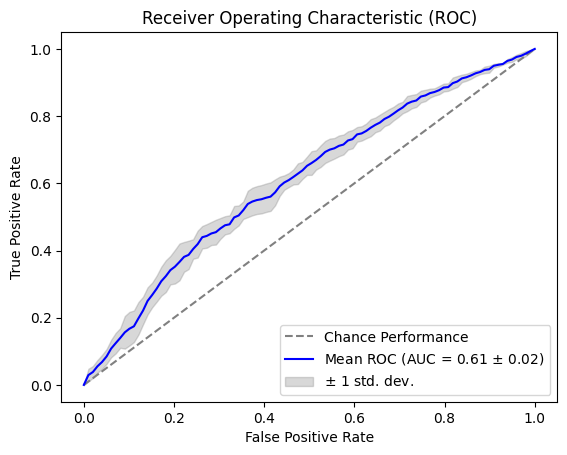

In [10]:
svm_pipeline(x, y, "roc_auc")

running param search
finished param search
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.6467391304347826
std (train): 0.011067787966743453
avg (validation): 0.6141304347826088
std (validation): 0.02848296232903412

printing roc_auc measures
avg (train): 0.6805092814332143
std (train): 0.0064977145341792095
avg (validation): 0.611481900738219
std (validation): 0.03271268110124027

printing f1_macro measures
avg (train): 0.602029997702183
std (train): 0.007790118589129659
avg (validation): 0.5654850084700614
std (validation): 0.029686751673089845


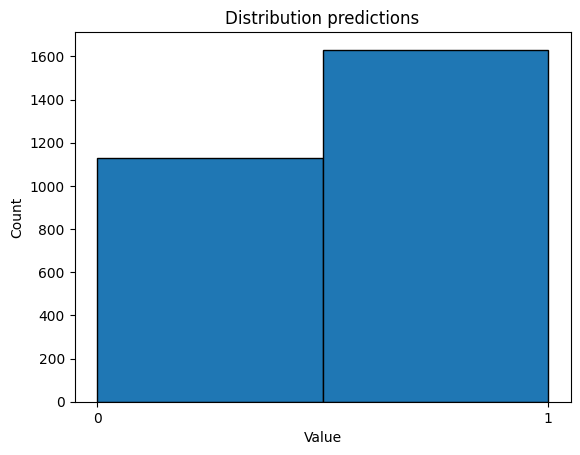

              precision    recall  f1-score   support

           0       0.34      0.55      0.42       708
           1       0.80      0.64      0.71      2052

    accuracy                           0.61      2760
   macro avg       0.57      0.59      0.57      2760
weighted avg       0.68      0.61      0.64      2760



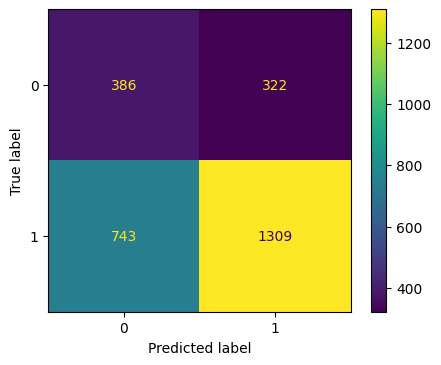

[[ 386  322]
 [ 743 1309]]
params after probability set to True:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


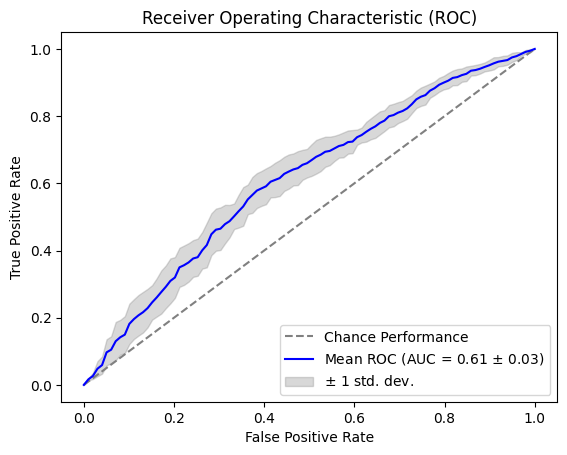

In [11]:
svm_pipeline(x, y, "f1_macro")

## Free Recall

Encoding 1 and 3 together.

In [12]:
df_cr = df[(df['free_cued_recall'] == 1) | (df['free_cued_recall'] == 3)]

In [13]:
df_cr

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,32.923183,0.033205,32.044086,32.676346,33.693400,1.649315,19.743969,11.842160,...,1,100.0,1.0,1,0.23,0.115000,0.0,0.0,0.0,0.0
16,16,0,20.974648,0.156597,18.389637,19.926580,24.381973,5.992336,92.538580,74.097580,...,1,100.0,1.0,1,2.35,0.261111,2.0,0.0,0.0,0.0
33,33,0,23.000427,0.173643,18.209530,23.437542,27.607498,9.397968,155.602460,164.689700,...,1,100.0,1.0,1,0.61,0.122000,0.0,0.0,0.0,0.0
39,39,0,37.571743,0.025486,36.763130,37.658370,38.466846,1.703716,32.898453,23.745441,...,1,NaN,NaN,1,0.04,0.040000,0.0,0.0,0.0,0.0
41,41,0,31.395313,0.185868,24.464250,33.889618,36.212710,11.748461,655.493400,1005.896300,...,1,100.0,1.0,3,0.09,0.090000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,22.760036,0.116876,21.855537,22.616938,23.708267,1.852730,53.822320,28.276720,...,1,NaN,NaN,1,0.77,0.256667,0.0,0.0,0.0,0.0
3313,3313,0,33.311300,0.038063,32.446200,32.790160,34.015087,1.568886,11.343438,5.040899,...,1,100.0,1.0,1,0.84,0.280000,1.0,0.0,0.0,0.0
3322,3322,0,22.198885,0.125262,20.153378,22.844580,24.517183,4.363806,135.166300,124.021720,...,1,NaN,NaN,1,0.89,0.074167,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.858000,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0


In [14]:
participant_ids = df_cr["participant"].values

df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_cr

/tmp/ipykernel_2800136/1982087727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,0.222011,-1.476180,0.607229,0.109329,-0.503131,-1.010456,-0.762776,-0.695276,...,1,100.0,1.0,1,-0.623469,0.890485,0.000000,0.000000,0.000000,0.000000
16,16,0,0.162070,1.274653,-0.332071,-0.199883,1.156364,1.903513,0.609296,0.398419,...,1,100.0,1.0,1,3.076041,2.258260,2.940588,0.000000,0.000000,0.000000
33,33,0,-0.947464,1.462671,-2.659530,-0.347434,1.523171,3.145803,0.407245,0.343628,...,1,100.0,1.0,1,-0.414910,-0.466001,-0.816497,-0.267261,0.000000,0.000000
39,39,0,1.377801,-1.446850,0.875876,1.502217,2.141795,-0.699061,-1.076670,-0.661563,...,1,NaN,NaN,1,-0.599434,-0.838333,-0.485071,-0.277350,-0.277350,0.000000
41,41,0,0.715256,-0.029246,0.094138,0.810608,0.890529,0.426734,2.513541,2.951436,...,1,100.0,1.0,3,-1.283298,-0.830305,-0.324443,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,-1.288958,-0.441700,-0.703013,-1.065515,-1.527071,-1.550925,-0.690201,-0.751148,...,1,NaN,NaN,1,-0.353804,0.690013,-0.688247,-0.483368,-0.447214,-0.301511
3313,3313,0,1.254800,-1.838889,0.895292,0.419094,0.034952,-0.712159,-0.972932,-0.792081,...,1,100.0,1.0,1,-0.670656,-0.015188,-0.127000,-0.353553,-0.353553,-0.353553
3322,3322,0,0.236137,-0.885988,0.449331,0.553671,0.098263,-0.455456,1.104841,1.497956,...,1,NaN,NaN,1,1.413583,-0.944164,-0.353553,0.000000,0.000000,0.000000
3334,3334,0,-0.215821,-0.732918,0.547938,-0.492261,-0.640395,-0.829169,0.415597,1.358923,...,1,100.0,1.0,1,0.295250,-0.722601,-0.899229,-0.585206,-0.277350,0.000000


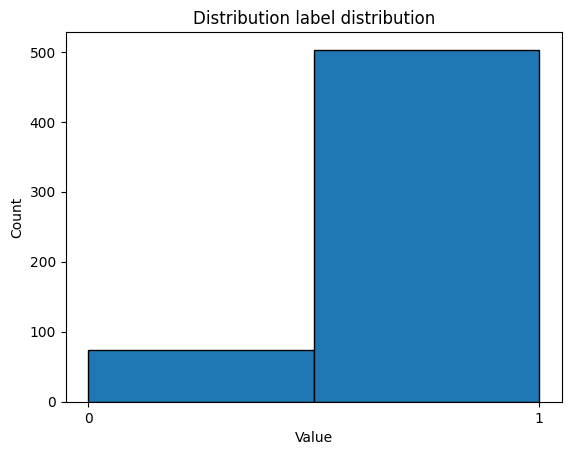

In [15]:
y = df_cr["accuracy"].values
x = df_cr[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.7378726840765886
std (train): 0.007954557800245952
avg (validation): 0.6914842578710645
std (validation): 0.07315508591675539

printing roc_auc measures
avg (train): 0.8344207764921311
std (train): 0.010436607192503573
avg (validation): 0.7135136256482791
std (validation): 0.03643220183111466

printing f1_macro measures
avg (train): 0.6253220029080353
std (train): 0.007211748152723214
avg (validation): 0.575300211709715
std (validation): 0.06312697916926525


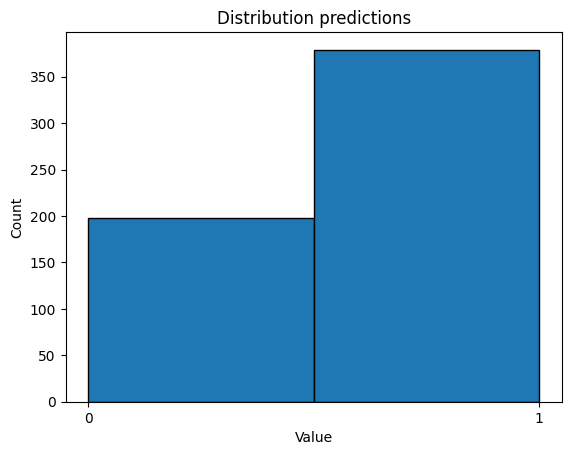

              precision    recall  f1-score   support

           0       0.24      0.64      0.35        74
           1       0.93      0.70      0.80       503

    accuracy                           0.69       577
   macro avg       0.58      0.67      0.57       577
weighted avg       0.84      0.69      0.74       577



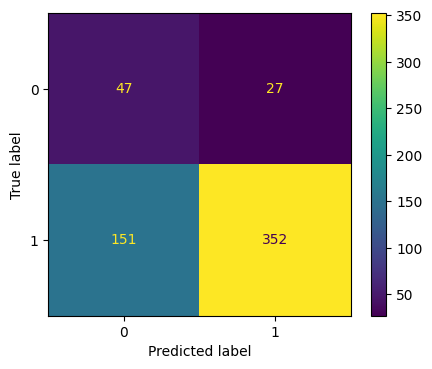

[[ 47  27]
 [151 352]]
params after probability set to True:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


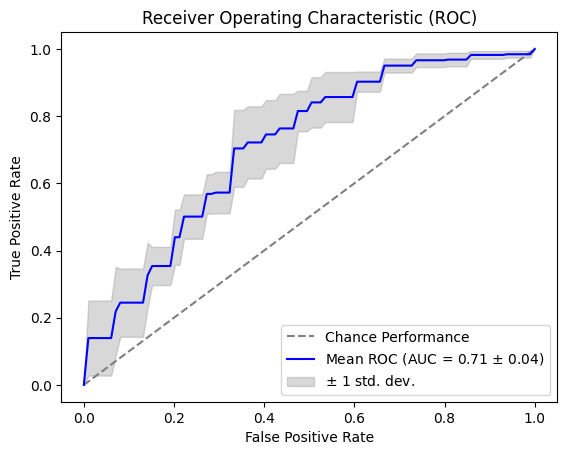

In [16]:
svm_pipeline(x, y, "roc_auc")

running param search
finished param search
{'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.7595411818839151
std (train): 0.0353439707413478
avg (validation): 0.7070614692653674
std (validation): 0.042404207735048584

printing roc_auc measures
avg (train): 0.8539495534482192
std (train): 0.005425783318539686
avg (validation): 0.7161472890146158
std (validation): 0.03818629423066211

printing f1_macro measures
avg (train): 0.645105646815358
std (train): 0.03184834715040725
avg (validation): 0.5755690411785281
std (validation): 0.040605418133194966


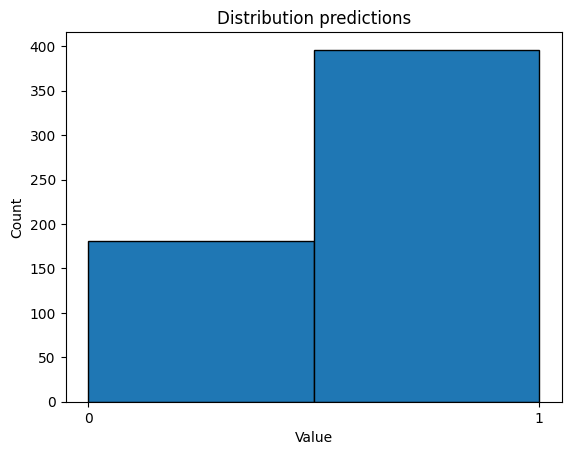

              precision    recall  f1-score   support

           0       0.24      0.58      0.34        74
           1       0.92      0.73      0.81       503

    accuracy                           0.71       577
   macro avg       0.58      0.65      0.57       577
weighted avg       0.83      0.71      0.75       577



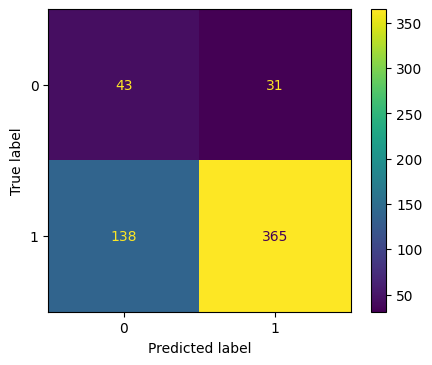

[[ 43  31]
 [138 365]]
params after probability set to True:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


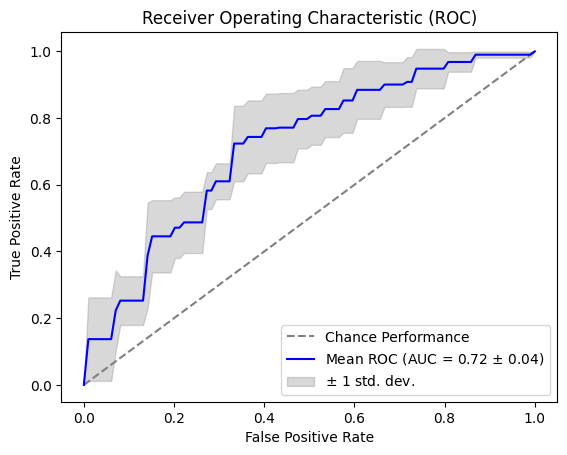

In [18]:
svm_pipeline(x, y, "f1_macro")

## Free Recall (only encoding 1)

In [19]:
df_1 = df[(df['free_cued_recall'] == 1)]

In [20]:
df_1

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,32.923183,0.033205,32.044086,32.676346,33.693400,1.649315,19.743969,11.842160,...,1,100.0,1.0,1,0.23,0.115000,0.0,0.0,0.0,0.0
16,16,0,20.974648,0.156597,18.389637,19.926580,24.381973,5.992336,92.538580,74.097580,...,1,100.0,1.0,1,2.35,0.261111,2.0,0.0,0.0,0.0
33,33,0,23.000427,0.173643,18.209530,23.437542,27.607498,9.397968,155.602460,164.689700,...,1,100.0,1.0,1,0.61,0.122000,0.0,0.0,0.0,0.0
39,39,0,37.571743,0.025486,36.763130,37.658370,38.466846,1.703716,32.898453,23.745441,...,1,NaN,NaN,1,0.04,0.040000,0.0,0.0,0.0,0.0
43,43,0,30.216204,0.176369,29.394360,31.971489,33.521046,4.126686,256.791100,115.068290,...,1,NaN,NaN,1,4.53,0.566250,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,22.760036,0.116876,21.855537,22.616938,23.708267,1.852730,53.822320,28.276720,...,1,NaN,NaN,1,0.77,0.256667,0.0,0.0,0.0,0.0
3313,3313,0,33.311300,0.038063,32.446200,32.790160,34.015087,1.568886,11.343438,5.040899,...,1,100.0,1.0,1,0.84,0.280000,1.0,0.0,0.0,0.0
3322,3322,0,22.198885,0.125262,20.153378,22.844580,24.517183,4.363806,135.166300,124.021720,...,1,NaN,NaN,1,0.89,0.074167,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.858000,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0


In [21]:
participant_ids = df_1["participant"].values

df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_1

/tmp/ipykernel_2800136/3439554378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
5,5,0,0.222011,-1.476180,0.607229,0.109329,-0.503131,-1.010456,-0.762776,-0.695276,...,1,100.0,1.0,1,-0.623469,0.890485,0.000000,0.000000,0.000000,0.000000
16,16,0,0.162070,1.274653,-0.332071,-0.199883,1.156364,1.903513,0.609296,0.398419,...,1,100.0,1.0,1,3.076041,2.258260,2.940588,0.000000,0.000000,0.000000
33,33,0,-0.947464,1.462671,-2.659530,-0.347434,1.523171,3.145803,0.407245,0.343628,...,1,100.0,1.0,1,-0.414910,-0.466001,-0.816497,-0.267261,0.000000,0.000000
39,39,0,1.377801,-1.446850,0.875876,1.502217,2.141795,-0.699061,-1.076670,-0.661563,...,1,NaN,NaN,1,-0.599434,-0.838333,-0.485071,-0.277350,-0.277350,0.000000
43,43,0,-0.206168,1.701517,-1.063773,0.612828,0.813658,1.581927,-0.318123,-0.692163,...,1,NaN,NaN,1,1.436346,1.615123,1.020621,0.408248,0.866025,1.581139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,0,-1.288958,-0.441700,-0.703013,-1.065515,-1.527071,-1.550925,-0.690201,-0.751148,...,1,NaN,NaN,1,-0.353804,0.690013,-0.688247,-0.483368,-0.447214,-0.301511
3313,3313,0,1.254800,-1.838889,0.895292,0.419094,0.034952,-0.712159,-0.972932,-0.792081,...,1,100.0,1.0,1,-0.670656,-0.015188,-0.127000,-0.353553,-0.353553,-0.353553
3322,3322,0,0.236137,-0.885988,0.449331,0.553671,0.098263,-0.455456,1.104841,1.497956,...,1,NaN,NaN,1,1.413583,-0.944164,-0.353553,0.000000,0.000000,0.000000
3334,3334,0,-0.215821,-0.732918,0.547938,-0.492261,-0.640395,-0.829169,0.415597,1.358923,...,1,100.0,1.0,1,0.295250,-0.722601,-0.899229,-0.585206,-0.277350,0.000000


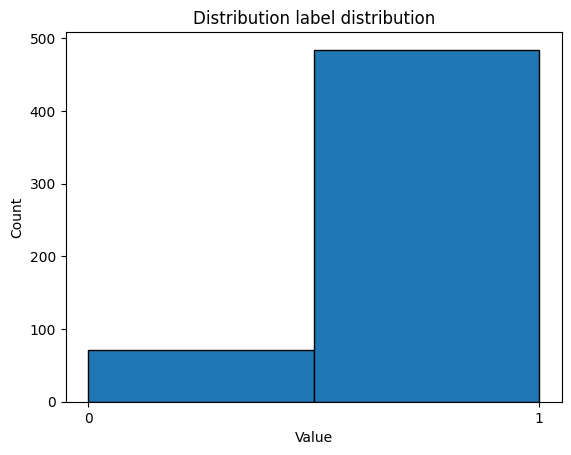

In [22]:
y = df_1["accuracy"].values
x = df_1[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

printing accuracy measures
avg (train): 0.7369369369369368
std (train): 0.03164073752943412
avg (validation): 0.6882882882882884
std (validation): 0.04719207514850014

printing roc_auc measures
avg (train): 0.8276982627290674
std (train): 0.011341196141946024
avg (validation): 0.7151628211422025
std (validation): 0.04868032936598414

printing f1_macro measures
avg (train): 0.6263737830361359
std (train): 0.024114978702773977
avg (validation): 0.5606452406529594
std (validation): 0.024952069838110824


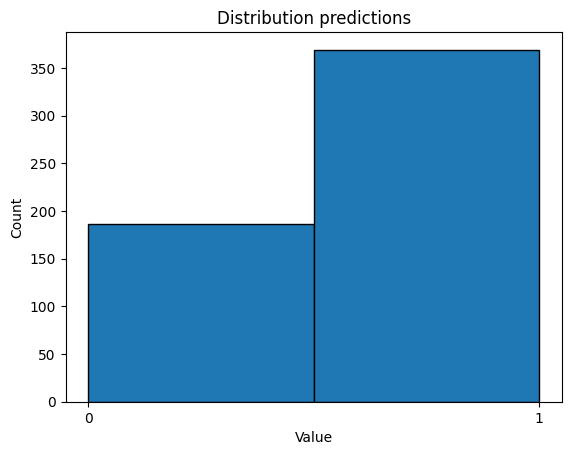

              precision    recall  f1-score   support

           0       0.23      0.59      0.33        71
           1       0.92      0.70      0.80       484

    accuracy                           0.69       555
   macro avg       0.57      0.65      0.56       555
weighted avg       0.83      0.69      0.74       555



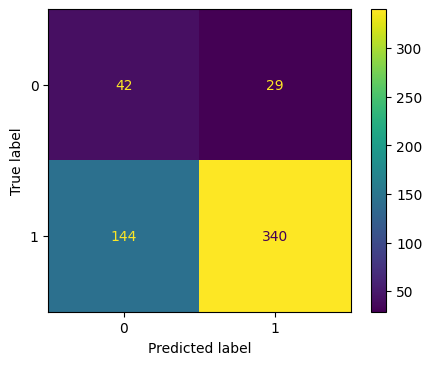

[[ 42  29]
 [144 340]]
params after probability set to True:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


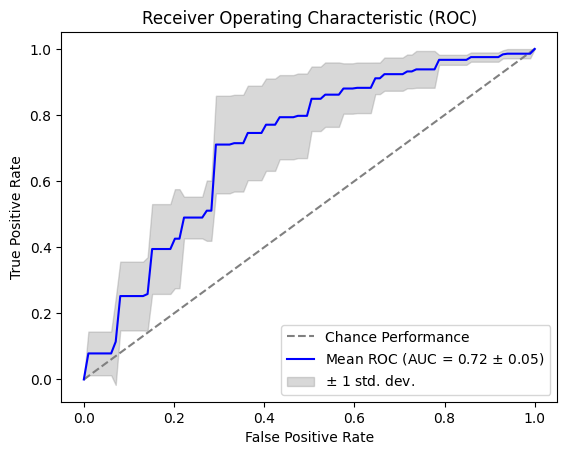

In [23]:
svm_pipeline(x, y, "roc_auc")

running param search
finished param search
{'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'linear'}

printing accuracy measures
avg (train): 0.9265765765765765
std (train): 0.020915651831070088
avg (validation): 0.7639639639639639
std (validation): 0.028715995406322956

printing roc_auc measures
avg (train): 0.9556096596882598
std (train): 0.015008091660439066
avg (validation): 0.6394078301423662
std (validation): 0.03796042493248114

printing f1_macro measures
avg (train): 0.8668008333515942
std (train): 0.03261343521448133
avg (validation): 0.5998187035285059
std (validation): 0.02210850907091936


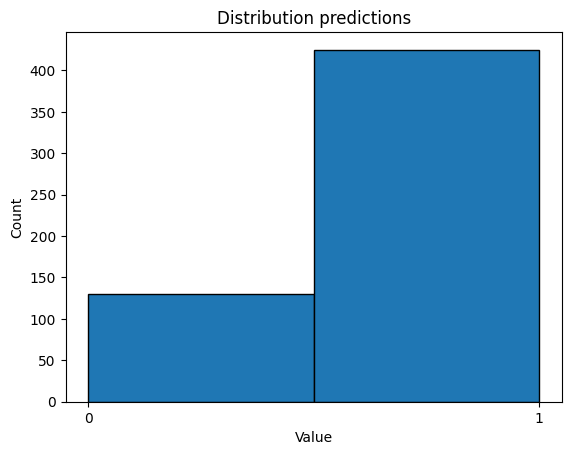

              precision    recall  f1-score   support

           0       0.27      0.49      0.35        71
           1       0.92      0.80      0.86       484

    accuracy                           0.76       555
   macro avg       0.59      0.65      0.60       555
weighted avg       0.83      0.76      0.79       555



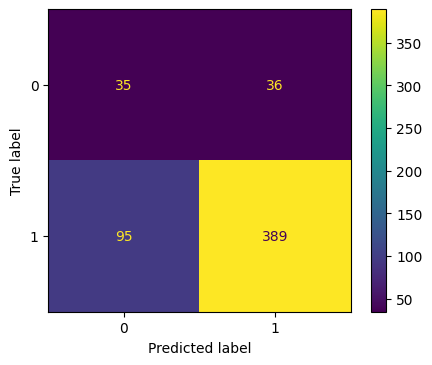

[[ 35  36]
 [ 95 389]]
params after probability set to True:
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


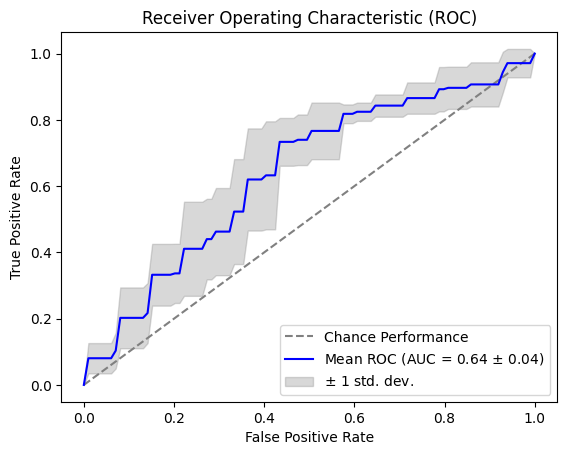

In [24]:
svm_pipeline(x, y, "f1_macro")

## Encoding 2 and 3 together

Trying out the last combination

In [25]:
df_23 = df[(df['free_cued_recall'] == 2) | (df['free_cued_recall'] == 3)]

In [26]:
df_23

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,27.852308,0.230130,19.607422,31.506860,34.374207,14.766785,68.922646,0.00000,...,1,100.0,1.0,2,0.16,0.160000,0.0,0.0,0.0,0.0
3331,3331,0,27.687168,0.203770,20.195457,31.439848,32.236520,12.041061,205.113660,173.75590,...,0,100.0,1.0,2,0.79,0.197500,0.0,0.0,0.0,0.0
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0


In [27]:
participant_ids = df_23["participant"].values

df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df_23

/tmp/ipykernel_2800136/1677081604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(


,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.233258,0.246706,0.898160,0.430829,0.221631,-0.868333,0.081498,0.309226,...,0,20.0,1.0,2,0.072490,-0.109689,0.327693,0.861776,-0.496841,-0.451335
1,1,0,-0.749761,0.877474,-2.046840,-0.406191,0.026621,2.499573,-0.826910,-0.650424,...,1,80.0,1.0,2,-0.067707,0.011551,0.256046,1.037393,-0.542636,-0.411693
2,2,0,-0.638487,-0.349550,-0.118559,-0.822770,-0.789592,-0.713067,-0.025660,0.166837,...,1,60.0,1.0,2,5.084691,1.381418,5.641326,2.236068,-0.267261,0.000000
3,3,0,0.869613,-0.602675,1.053841,0.987032,0.467012,-0.829644,-0.287560,-0.378629,...,1,100.0,2.0,2,-0.751721,-0.653095,-0.687871,-0.524350,-0.353553,-0.282843
4,4,0,0.376321,-0.495052,0.631315,-0.118100,-0.203377,-0.727075,-0.972397,-0.572318,...,1,80.0,1.0,2,-0.395513,-0.358778,-0.091971,-0.665138,-0.532152,-0.456435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,3330,0,-0.426296,0.663743,-0.868541,0.187972,0.124666,1.117658,-0.764227,-0.782672,...,1,100.0,1.0,2,-0.748540,-0.382743,-0.651631,-0.583460,-0.485071,-0.324443
3331,3331,0,-1.582325,1.379249,-2.251972,-0.058250,-0.483334,2.310860,0.080559,-0.101149,...,0,100.0,1.0,2,-0.507045,0.039987,-0.727171,-0.378284,-0.181818,-0.204124
3332,3332,0,-0.406894,1.313422,-1.045187,-0.413070,0.304133,1.585114,0.821624,0.867237,...,1,80.0,1.0,2,0.592695,0.183258,1.959633,1.069883,-0.523205,-0.441771
3333,3333,0,-0.183899,-0.212176,0.548571,0.198088,-0.506959,-0.892824,0.468644,0.221079,...,1,80.0,2.0,2,-0.280913,-0.178510,-0.687871,-0.524350,-0.353553,-0.282843


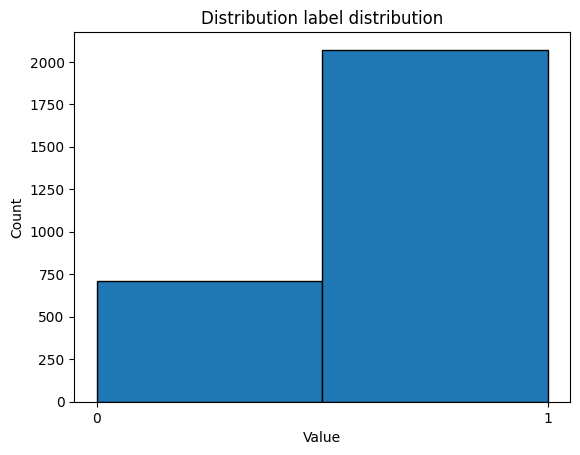

In [28]:
y = df_23["accuracy"].values
x = df_23[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values
plot_hist(y, "label distribution")

running param search
finished param search
{'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'sigmoid'}

printing accuracy measures
avg (train): 0.5828536297283382
std (train): 0.011070025249847371
avg (validation): 0.5636206295286931
std (validation): 0.014024743734990927

printing roc_auc measures
avg (train): 0.6476545673738906
std (train): 0.0063355262667670114
avg (validation): 0.6172916651009304
std (validation): 0.028748281076545854

printing f1_macro measures
avg (train): 0.5559359277793078
std (train): 0.008683473585828941
avg (validation): 0.5371744214930937
std (validation): 0.01418035255317191


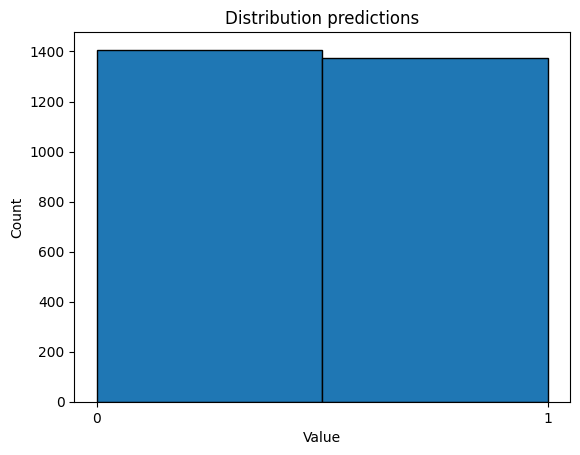

              precision    recall  f1-score   support

           0       0.32      0.64      0.43       711
           1       0.81      0.54      0.65      2071

    accuracy                           0.56      2782
   macro avg       0.57      0.59      0.54      2782
weighted avg       0.69      0.56      0.59      2782



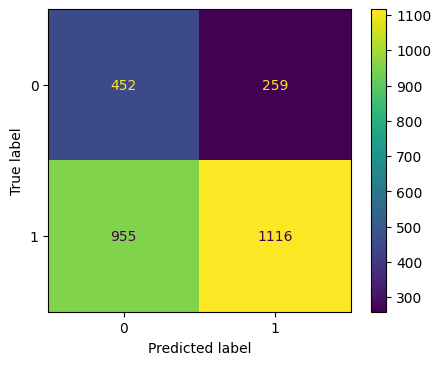

[[ 452  259]
 [ 955 1116]]
params after probability set to True:
{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'sigmoid', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


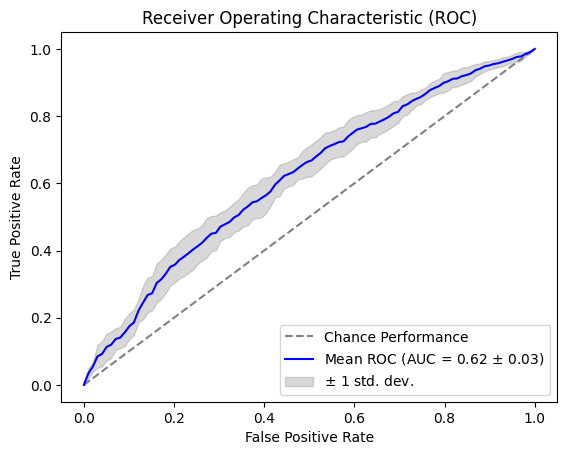

In [29]:
svm_pipeline(x, y, "roc_auc")

In [ ]:
svm_pipeline(x, y, "f1_macro")

running param search
